# Zestaw danych przewidywania udaru mózgu
## Wstęp
Źródło danych: [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download) $\hspace{0.1cm}$ `[Link](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download)` (Data pobrania: 2.01.2023)\
Dane zawierają następujące kolumny:
- **id** - ID pacjenta
- **gender** - płeć pacjenta
- **age** - wiek pacjenta
- **hypertension** - czy stwierdzono nadciśnienie u pacjenta
- **heart_disease** - czy stwierdzono chorobę serca u pacjenta
- **ever_married** - czy pacjent jest/był w związku małżeńskim
- **work_type** - rodzaj pracy pacjenta
- **Residence_type** - rodzaj zamieszkania pacjenta
- **avg_glucose_level** - średni poziom glukozy u pacjenta
- **bmi** - współczynnik BMI pacjenta
- **smoking_status** - stosunek pacjenta do papierosów
- **stroke** - czy u pacjenta wystąpił udar

### Importowanie potrzebnych bibliotek/paczek

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Wczytywanie danych i wstępna obróbka

In [20]:
strokes = pd.read_csv("healthcare-dataset-stroke-data.csv")
strokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [21]:
strokes.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [22]:
duplicated_rows = strokes.duplicated()
duplicated_rows[duplicated_rows == True].sum()

0

In [23]:
strokes.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Zbiór zawiera dane o 5110 pacjentach.

Zmienna typu float64 `age` może zostać zamieniona na zmienną typu integer, taki jest jej oryginalny format.

Pierw jednak trzeba zająć się brakującymi danymi. Jako, że w 201 przypadkach nie podano informacji o współczynniku BMI, pozwolimy sobie usunąć rzędy, które są wybrakowane.

Zbiór danych nie posiada duplikatów.

In [24]:
strokes_with_null_bmi = strokes.copy()
strokes.dropna(inplace=True)
strokes = strokes.astype({'age': 'int','hypertension': 'object', 'heart_disease':'object', 'stroke':'object'})
print("Ilość wierszy w zbiorze 'strokes': " + str(len(strokes)))
print("Ilość wierszy w zbiorze 'strokes_with_null_bmi': " + str(len(strokes_with_null_bmi)))

Ilość wierszy w zbiorze 'strokes': 4909
Ilość wierszy w zbiorze 'strokes_with_null_bmi': 5110


#### Sprawdzenie ilości przypadków w których nie wystąpił udar u pacjęta bez danych o jego BMI

In [25]:
strokes_sum = (strokes_with_null_bmi["stroke"]).eq(0).sum()
strokes_bmi_null_sum = (((strokes_with_null_bmi["stroke"]).eq(0))&((strokes_with_null_bmi["bmi"]).isnull())).sum()
strokes_bmi_null_percent = strokes_bmi_null_sum/strokes_sum * 100

strokes_bmi_null_percent

3.3120757045875333

Około 3% pacjentów u których nie wystąpił udar, nie ma podanej informacji o ich współczynniku BMI

In [26]:
strokes.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [27]:
strokes_with_null_bmi.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Analiza podstawowa
#### Statystyki zmiennych numerycznych

In [28]:
numeric_cols = ['age', 'avg_glucose_level', 'bmi']
strokes[numeric_cols].describe()

,age,avg_glucose_level,bmi
count,4909.000000,4909.000000,4909.000000
mean,42.854145,105.305150,28.893237
std,22.575986,44.424341,7.854067
min,0.000000,55.120000,10.300000
25%,25.000000,77.070000,23.500000
50%,44.000000,91.680000,28.100000
75%,60.000000,113.570000,33.100000
max,82.000000,271.740000,97.600000


#### Jakie kategorie i ich ilości dla zmiennych nienumerycznych

In [29]:
categorical_cols = strokes.select_dtypes(include='object').columns

for col in categorical_cols:
    print(strokes[col].value_counts(), end='\n\n')

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

0    4458
1     451
Name: hypertension, dtype: int64

0    4666
1     243
Name: heart_disease, dtype: int64

Yes    3204
No     1705
Name: ever_married, dtype: int64

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

0    4700
1     209
Name: stroke, dtype: int64



## Wykresy
Dzielenie kolumny wiek na grupy.

In [30]:
age_groups = ["{0} - {1}".format(i, i + 9) for i in range(20, 90, 10)]
strokes['Age Group'] = pd.cut(strokes['age'], range(20, 95, 10), right=False, labels=age_groups)

strokes[['age', 'Age Group']].head()

,age,Age Group
0,67,60 - 69
2,80,80 - 89
3,49,40 - 49
4,79,70 - 79
5,81,80 - 89


Podział osób wzgledem wieku

In [31]:
strokes['Age Group'].value_counts()

50 - 59    805
40 - 49    705
30 - 39    631
60 - 69    590
20 - 29    539
70 - 79    513
80 - 89    182
Name: Age Group, dtype: int64

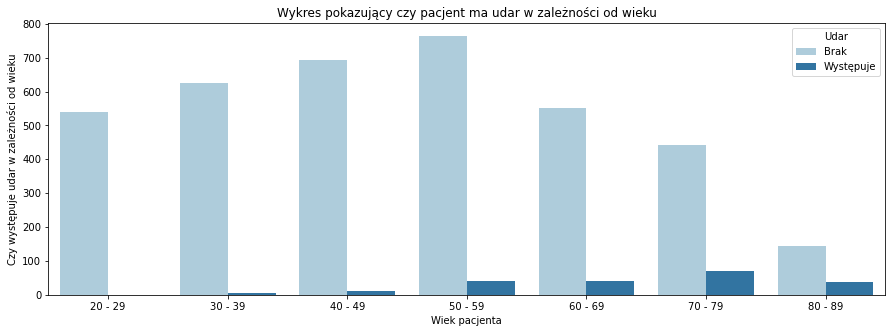

In [32]:
fig, axes = plt.subplots(figsize=(15,5))
g = sns.countplot(x='Age Group', data=strokes, hue='stroke', palette='Paired')
g.set_title('Wykres pokazujący czy pacjent ma udar w zależności od wieku')
g.set_xlabel('Wiek pacjenta')
g.set_ylabel('Czy występuje udar w zależności od wieku')
mylabel=["Brak","Występuje"]
g.legend(title='Udar',loc='upper right',labels=mylabel)

plt.show()

Wykonujemy korelacje danych

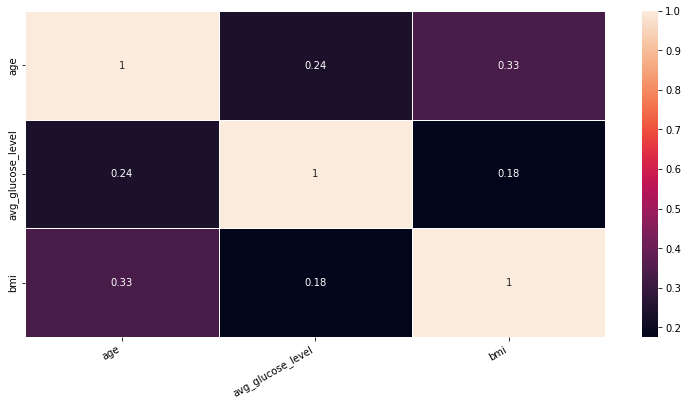

In [33]:
corrmat = strokes[numeric_cols].corr()
plt.figure(figsize=(13, 6))
sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

Na podstawie powyższej korelacji można stwierdzić, że tylko pomiędzy wiekiem a bmi występuję korelacja dostateczna, a w pozostałych przypadkach korelacja słaba.

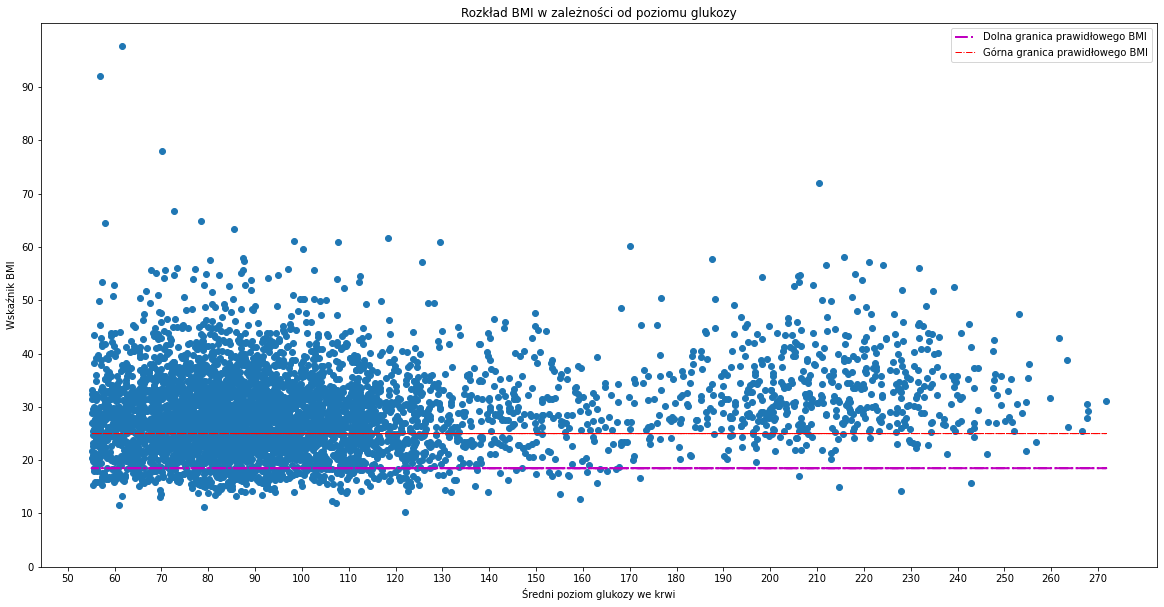

In [34]:
plt.figure(figsize=(20,10))
lowerBMI=[18.5]*len(strokes['avg_glucose_level'])
upperBMI=[24.99]*len(strokes['avg_glucose_level'])

plt.scatter(strokes['avg_glucose_level'], strokes['bmi'])
plt.plot(strokes['avg_glucose_level'],lowerBMI,'-.m',label="Dolna granica prawidłowego BMI",linewidth=2)
plt.plot(strokes['avg_glucose_level'],upperBMI,'-.r',label="Górna granica prawidłowego BMI",linewidth=1)
plt.title('Rozkład BMI w zależności od poziomu glukozy')
plt.xlabel('Średni poziom glukozy we krwi')
plt.ylabel('Wskaźnik BMI')
plt.xticks(np.arange(50, 280, step=10))
plt.yticks(np.arange(0, 100, step=10))
plt.legend(loc='upper right')
plt.show()

Wniosek: Jak widać na powyższym wykresie pomiędzy wskaźnikiem bmi, a średnim poziomem glukozy nie ma zbytniej zależności, co można było zobaczyć na wcześniej już wykonanej korelacji danych.

Zestawienie osób, z nadciśnieniem z całą liczebnością poszczególnych grup kategorii.

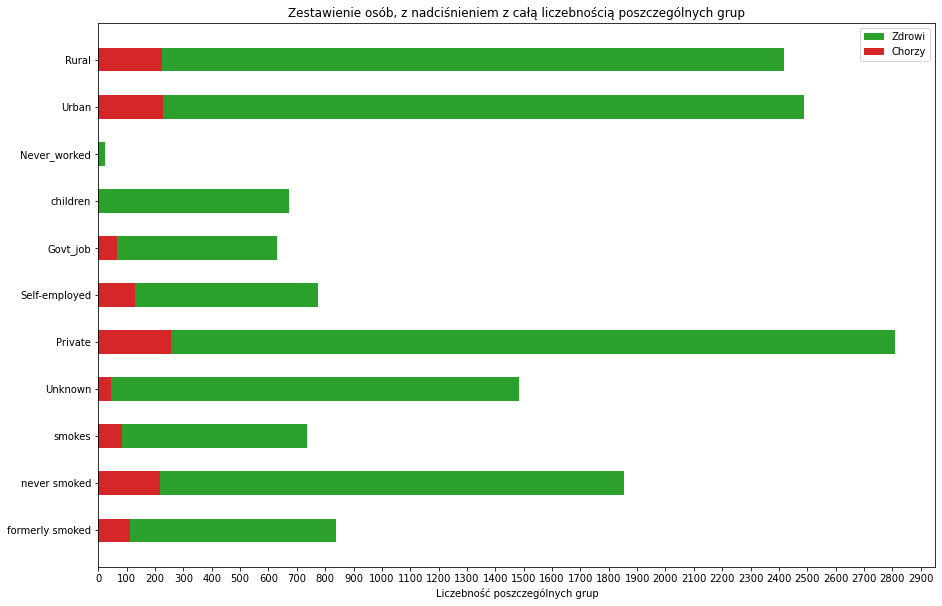

In [35]:
import itertools
smoking=strokes.loc[:,'smoking_status'].unique().tolist()
work=strokes.loc[:,'work_type'].unique().tolist()
residence=strokes.loc[:,'Residence_type'].unique().tolist()
mylabel=[smoking, work,residence]
mylabel = itertools.chain(*mylabel)

mylabel=list(mylabel)

values=[]
sickValues=[]
for value in smoking:
    values.append(strokes.loc[:,'smoking_status'].tolist().count(value))
    sickValues.append(strokes.loc[strokes['smoking_status']==value,'hypertension'].tolist().count(1))
for value in work:
    values.append(strokes.loc[:,'work_type'].tolist().count(value))
    sickValues.append(strokes.loc[strokes['work_type']==value,'hypertension'].tolist().count(1))
for value in residence:
    values.append(strokes.loc[:,'Residence_type'].tolist().count(value))
    sickValues.append(strokes.loc[strokes['Residence_type']==value,'hypertension'].tolist().count(1))

width = 0.5
   
fig, ax = plt.subplots(figsize=(15, 10))
   
ax.barh(mylabel, values, width,  
        label ='Zdrowi',color='tab:green') 
   
ax.barh(mylabel, sickValues, width,  
        left = 0,  
        label ='Chorzy', color='tab:red') 
 
ax.set_xlabel('Liczebność poszczególnych grup') 
plt.xticks(np.arange(0, 3000, step=100))
ax.legend() 
   
ax.set_title('Zestawienie osób, z nadciśnieniem z całą liczebnością poszczególnych grup')
   
plt.show()

Liczba osób, u których wystąpił udar mózgu wraz z procentowym udziałem w całości zbioru.

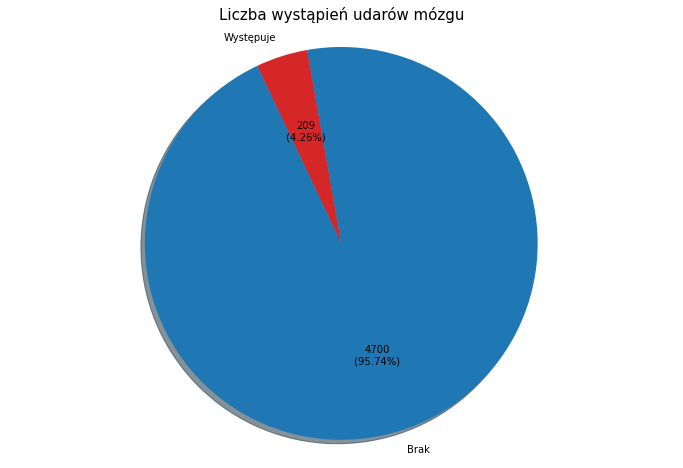

In [36]:
plt.figure(figsize=(12, 8))
values=[strokes["stroke"].eq(1).sum(),strokes["stroke"].eq(0).sum()]
mylabel=["Występuje","Brak"]
colors = ['tab:red', 'tab:blue']

plt.pie(values,labels=mylabel,colors = colors,autopct=lambda p: '{:.0f}\n ({:.2f}%) '.format(p * sum(values)/100, p), shadow=True, startangle=100)
    
plt.title('Liczba wystąpień udarów mózgu', ha='center', fontsize=15)

plt.axis('equal')

plt.show()

Wykres pudełkowy rozkładu danych dla kolumny bmi u pacjenta.

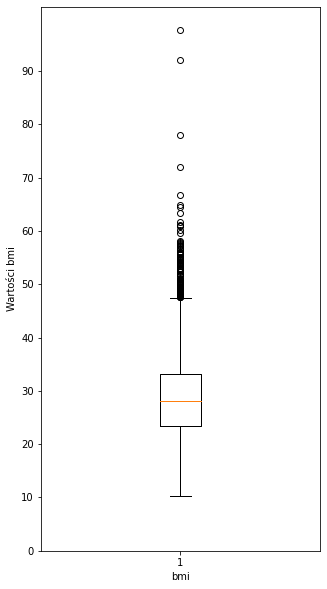

In [37]:
plt.figure(figsize=(5, 10))
plt.boxplot(strokes['bmi'])
plt.ylabel("Wartości bmi")
plt.xlabel("bmi")
plt.yticks(np.arange(0, 100, step=10))
plt.show()

## Autor
Michał Pluszczewski